In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy import stats

## Describe Data

In [68]:
# 2. Load data from 2 Excel files

df_raw = pd.read_excel('C:/Users/caberoca/Danone/DACH Data and Digital Powerhouse - Data & Analytics Team/UseCaseFiles/MCE/MCE MMM Fortimel/Project/MMM_Fortimel/output_df/final_df_timewindow.xlsx', index_col=[0])

In [69]:
df_raw.head()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,Invoiced Sales (CAF)
0,2021-02-07,98.28,2083.68,686.43,0.00,200329.43
1,2021-02-14,421.20,2980.82,991.51,104.16,206378.66
2,2021-02-21,730.08,3820.08,381.35,208.32,407887.50
3,2021-02-28,351.00,4254.18,2593.18,520.80,338943.57
4,2021-03-07,659.88,4456.76,1677.94,1093.68,334335.30


In [70]:
df_raw.shape

(113, 6)

In [71]:
df_raw.columns

Index(['date', 'email_cost', 'phone_cost', 'f2f_cost', 'videocall_cost',
       'Invoiced Sales (CAF)'],
      dtype='object')

In [72]:
# Drop columns

#df_merged = df_raw.drop(columns=['Unnamed: 0'])
df_merged = df_raw.rename(columns={'Invoiced Sales (CAF)': 'sales'})

In [73]:
df_merged.shape

(113, 6)

In [74]:
df_merged.head()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
0,2021-02-07,98.28,2083.68,686.43,0.00,200329.43
1,2021-02-14,421.20,2980.82,991.51,104.16,206378.66
2,2021-02-21,730.08,3820.08,381.35,208.32,407887.50
3,2021-02-28,351.00,4254.18,2593.18,520.80,338943.57
4,2021-03-07,659.88,4456.76,1677.94,1093.68,334335.30


In [75]:
df_merged.describe()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
count,113,113.000000,113.000000,113.000000,113.000000,113.000000
mean,2022-03-06 00:00:00,689.450973,2899.378230,8214.886460,522.643540,376818.281975
min,2021-02-07 00:00:00,98.280000,260.460000,76.270000,0.000000,75874.660000
25%,2021-08-22 00:00:00,397.800000,2344.140000,4118.580000,156.240000,291880.260000
50%,2022-03-06 00:00:00,622.440000,2836.120000,7398.190000,364.560000,360691.490000
75%,2022-09-18 00:00:00,879.840000,3443.860000,11516.770000,677.040000,458965.450000
max,2023-04-02 00:00:00,2293.200000,5469.660000,20211.550000,2083.200000,843586.260000
std,NaN,390.620964,915.755765,5266.543515,523.764272,138006.827381


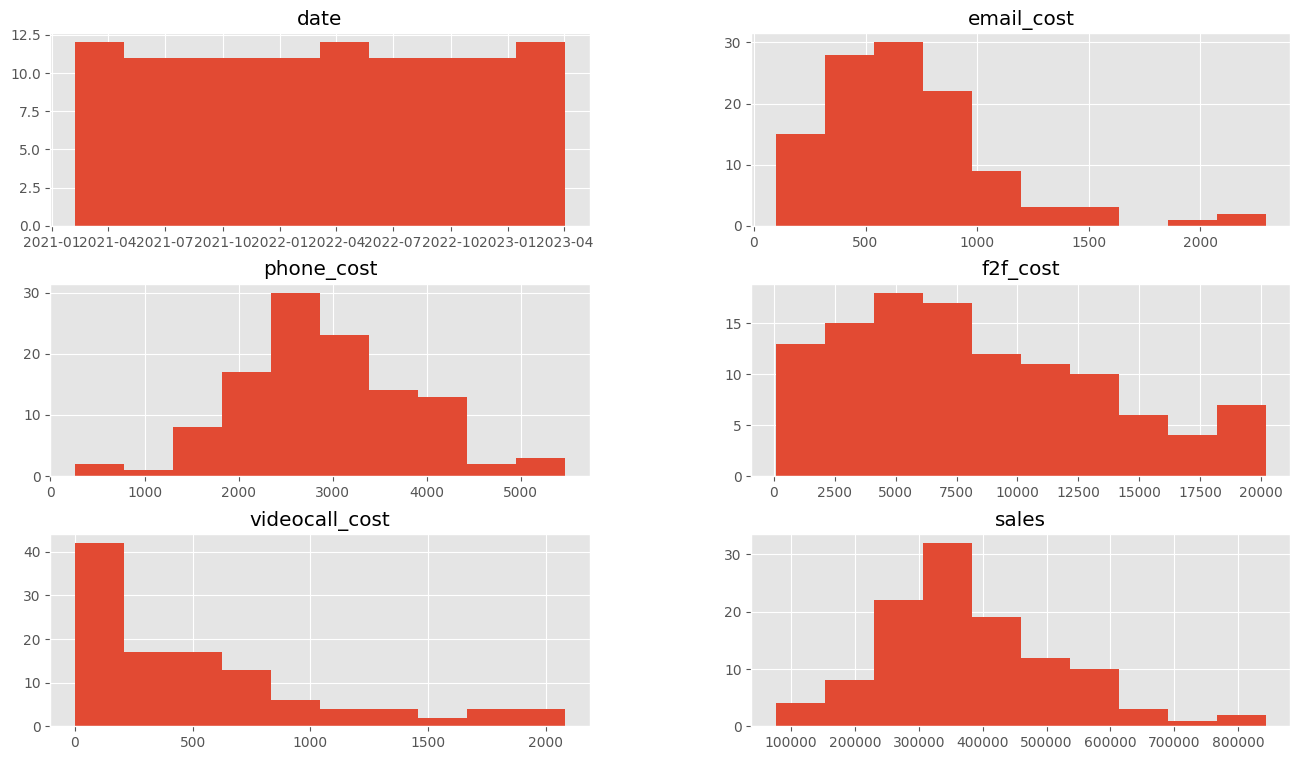

In [76]:
df_merged.hist()
plt.show()

In [77]:
df_merged.corr()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
date,1.000000,0.495202,-0.392919,0.780075,0.303293,0.037938
email_cost,0.495202,1.000000,0.025643,0.547357,0.320917,0.046463
phone_cost,-0.392919,0.025643,1.000000,-0.212388,0.090153,0.049805
f2f_cost,0.780075,0.547357,-0.212388,1.000000,0.399024,0.006829
videocall_cost,0.303293,0.320917,0.090153,0.399024,1.000000,-0.144856
sales,0.037938,0.046463,0.049805,0.006829,-0.144856,1.000000


In [78]:
df_merged.columns

Index(['date', 'email_cost', 'phone_cost', 'f2f_cost', 'videocall_cost',
       'sales'],
      dtype='object')

In [79]:
count = (df_merged[['email_cost', 'phone_cost', 'f2f_cost', 'videocall_cost', 'sales']] == 0).sum()
print(count)

email_cost        0
phone_cost        0
f2f_cost          0
videocall_cost    8
sales             0
dtype: int64


In [80]:
# df_clean_full = df_merged[(np.abs(stats.zscore(df_merged)) < 3).all(axis=1)]

## Prepare Data for Model

### Visualize

<Axes: xlabel='email_cost', ylabel='sales'>

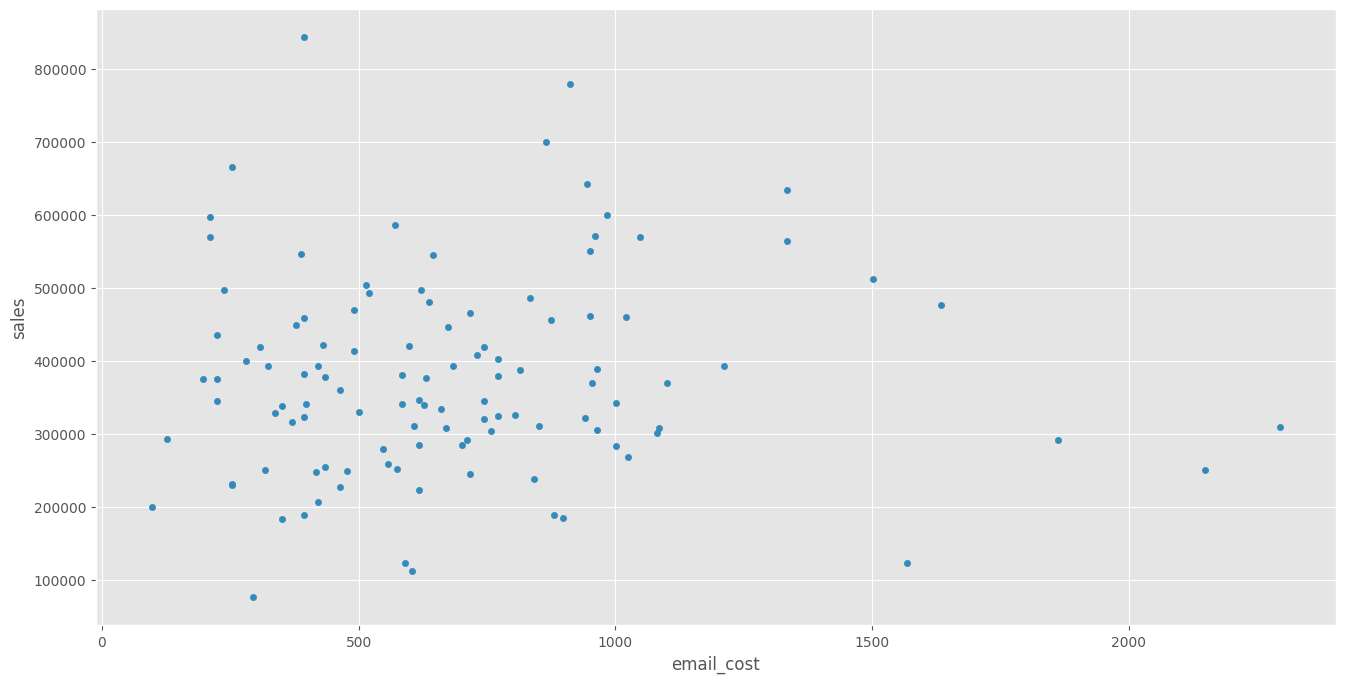

In [81]:
# visualize the relationship between the features and response using scatterplots
df_merged.plot(kind='scatter', x='email_cost', y='sales',  figsize=(16, 8))

<Axes: xlabel='phone_cost', ylabel='sales'>

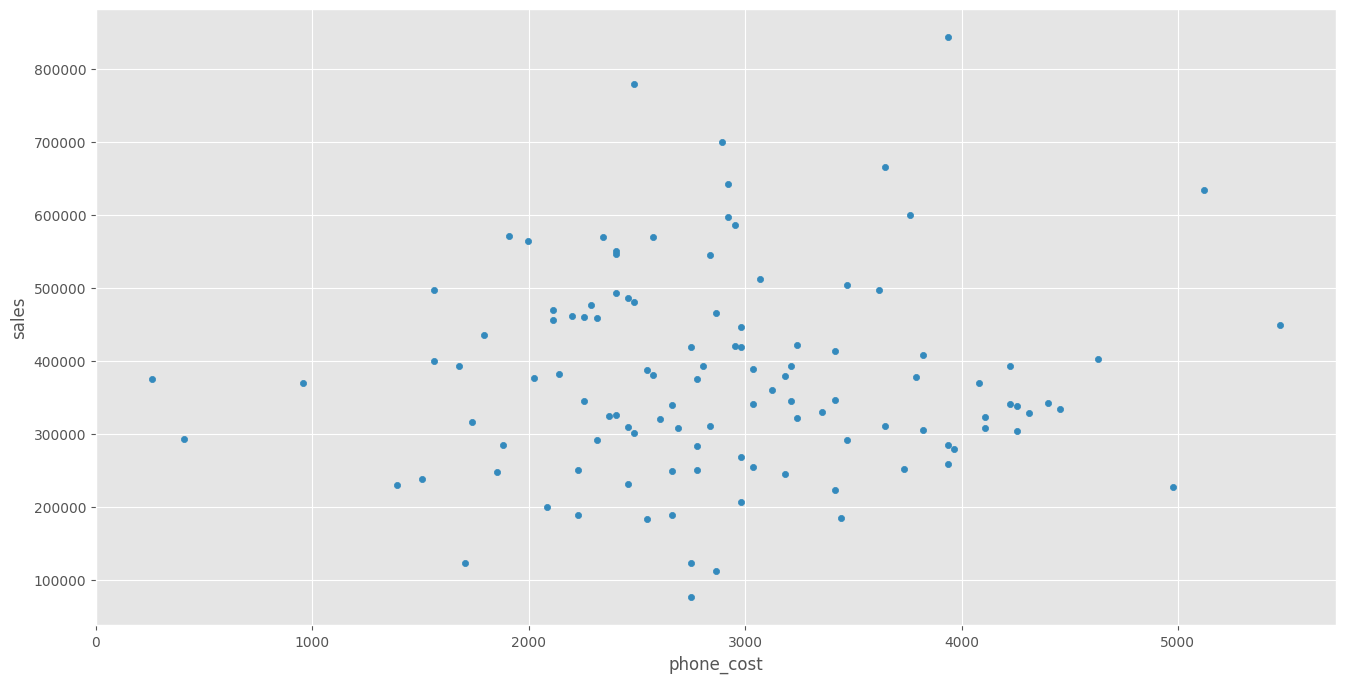

In [82]:
# visualize the relationship between the features and response using scatterplots
df_merged.plot(kind='scatter', x='phone_cost', y='sales',  figsize=(16, 8))

<Axes: xlabel='f2f_cost', ylabel='sales'>

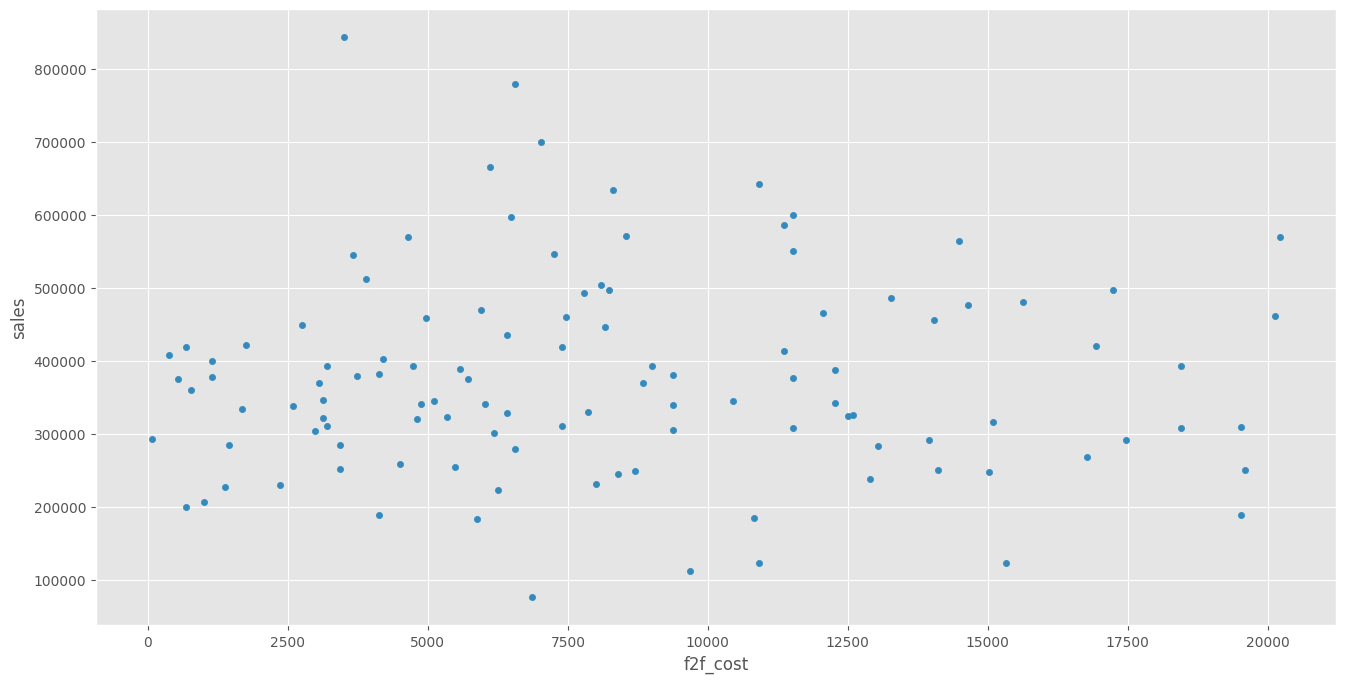

In [83]:
# visualize the relationship between the features and response using scatterplots
df_merged.plot(kind='scatter', x='f2f_cost', y='sales',  figsize=(16, 8))

<Axes: xlabel='videocall_cost', ylabel='sales'>

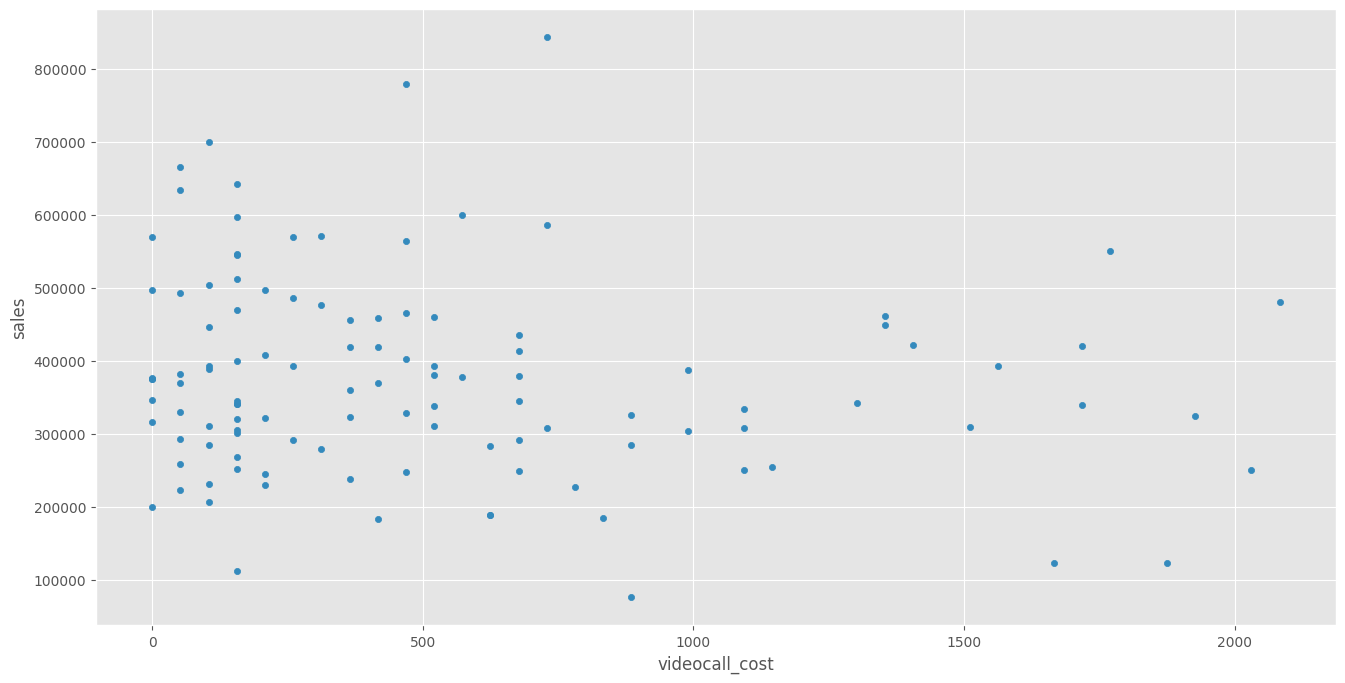

In [84]:
# visualize the relationship between the features and response using scatterplots
df_merged.plot(kind='scatter', x='videocall_cost', y='sales',  figsize=(16, 8))

## OLS Regression

### Normalization

In [85]:
data = df_merged.drop('date', axis=1)

In [86]:
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

In [87]:
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [88]:
df_scaled.head()

,email_cost,phone_cost,f2f_cost,videocall_cost,sales
0,0.000000,0.350000,0.030303,0.000,0.162111
1,0.147122,0.522222,0.045455,0.050,0.169991
2,0.287846,0.683333,0.015152,0.100,0.432471
3,0.115139,0.766667,0.125000,0.250,0.342666
4,0.255864,0.805556,0.079545,0.525,0.336664


### Linear - Linear

In [89]:
X = df_scaled[['email_cost', 'phone_cost', 'f2f_cost', 'videocall_cost']]
y = df_scaled[['sales']]

In [90]:
X.shape

(113, 4)

In [91]:
X.head()

,email_cost,phone_cost,f2f_cost,videocall_cost
0,0.000000,0.350000,0.030303,0.000
1,0.147122,0.522222,0.045455,0.050
2,0.287846,0.683333,0.015152,0.100
3,0.115139,0.766667,0.125000,0.250
4,0.255864,0.805556,0.079545,0.525


In [92]:
X = sm.add_constant(X)

In [93]:
model = sm.OLS(y, X).fit()

In [94]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.037
Date:                Wed, 05 Jul 2023   Prob (F-statistic):              0.392
Time:                        16:54:31   Log-Likelihood:                 36.212
No. Observations:                 113   AIC:                            -62.42
Df Residuals:                     108   BIC:                            -48.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3491      0.064      5.

### Log-Log / Elasticity

In [100]:
X = df_scaled[['email_cost', 'phone_cost', 'f2f_cost', 'videocall_cost']]
y = df_scaled[['sales']]

In [101]:
X += 0.1
y += 0.1

X = np.log(X)
y = np.log(y)

In [102]:
X = sm.add_constant(X)

In [103]:
model = sm.OLS(y, X).fit()

In [104]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.396
Date:                Wed, 05 Jul 2023   Prob (F-statistic):              0.240
Time:                        16:55:41   Log-Likelihood:                -52.241
No. Observations:                 113   AIC:                             114.5
Df Residuals:                     108   BIC:                             128.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7742      0.112     -6.

### Log(y) - Lin(X)

In [67]:
X = df_clean[['phone']]
y = df_clean[['prescriptions']]

NameError: name 'df_clean' is not defined

In [48]:
X = df_clean[['f2f', 'samples', 'event_participants', 'offline_mailings', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'event_participants', 'offline_mailings', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [89]:
X = df_clean[['email', 'mailchimp', 'f2f', 'samples', 'total_touchpoints', 'total_samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'prescriptions']]
y = df_clean[['prescriptions']]

In [90]:
#y = y.mask(y == 0, 1)

y = np.log(y)

In [91]:
X = sm.add_constant(X)

In [92]:
model = sm.OLS(y, X).fit()

In [93]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          prescriptions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.48e-138
Time:                        12:59:26   Log-Likelihood:                -464.90
No. Observations:                 606   AIC:                             955.8
Df Residuals:                     593   BIC:                             1013.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Find the Max Point: Analysis of Logarithmic-Behaviour Variables

### F2F Meetings

In [50]:
df_f2f = df_clean_full[['f2f','prescriptions']]

In [51]:
df_f2f_min = df_f2f[df_f2f['f2f'] <= 25]

In [52]:
df_f2f_max = df_f2f[df_f2f['f2f'] > 25]

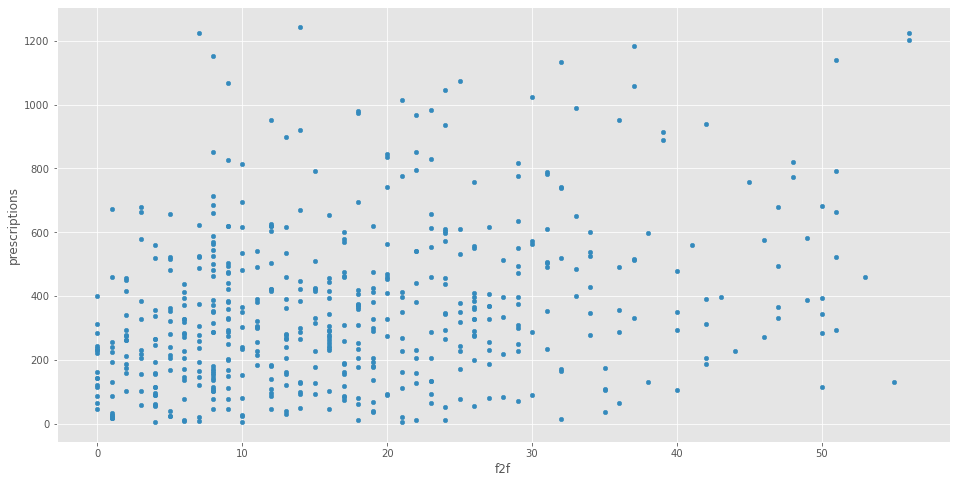

In [53]:
# F2F meetings
df_f2f.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

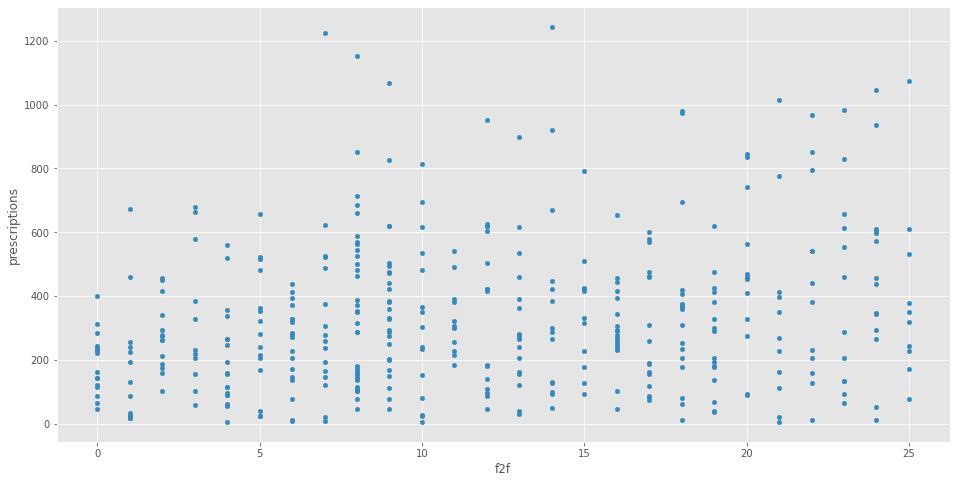

In [54]:
# F2F meetings
df_f2f_min.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

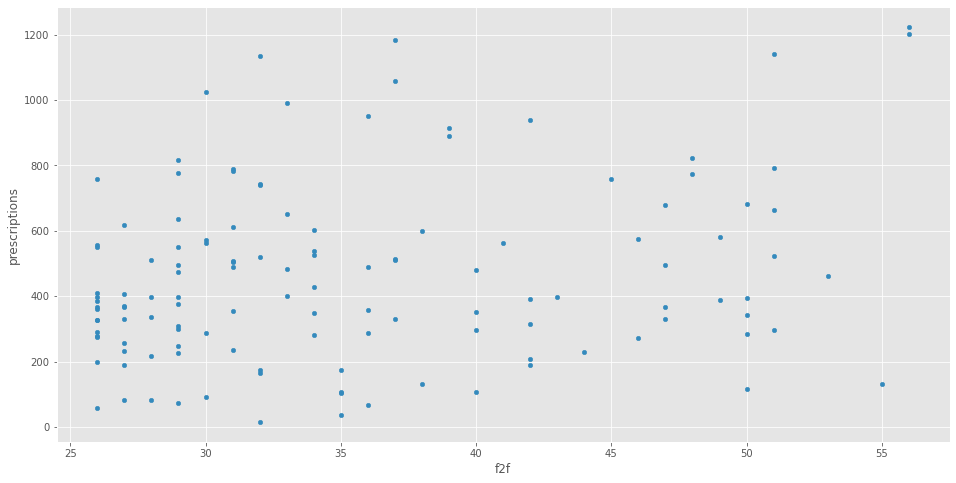

In [55]:
# F2F meetings
df_f2f_max.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

### Samples

In [56]:
df_samples = df_clean_full[['samples','prescriptions']]

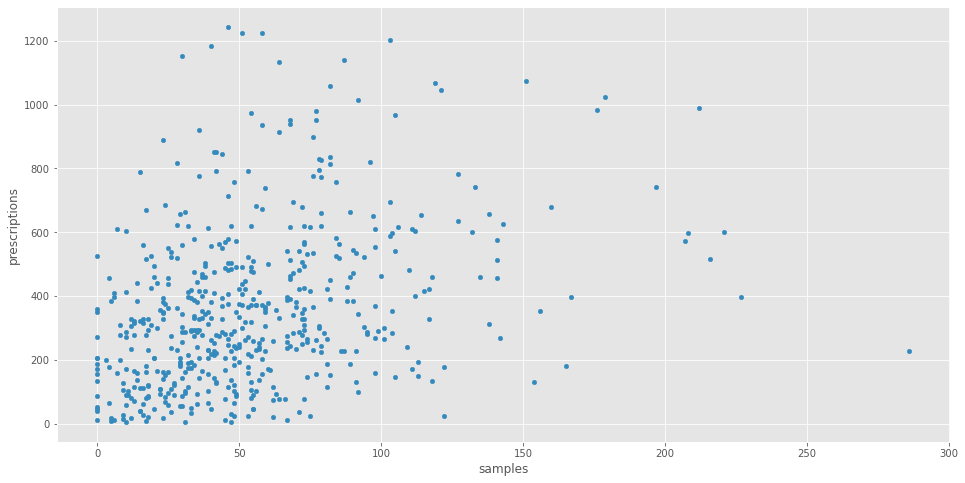

In [57]:
# Samples
df_samples.plot(kind='scatter', x='samples', y='prescriptions',  figsize=(16, 8))

In [58]:
df_samples_min = df_samples[df_samples['samples'] <= 125]

In [59]:
df_samples_max = df_samples[df_samples['samples'] > 125]

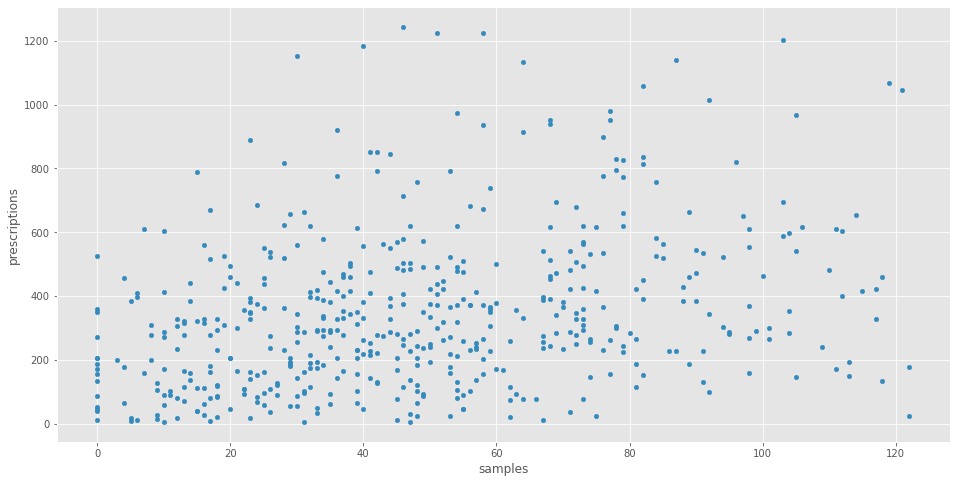

In [60]:
# Samples
df_samples_min.plot(kind='scatter', x='samples', y='prescriptions', figsize=(16, 8))

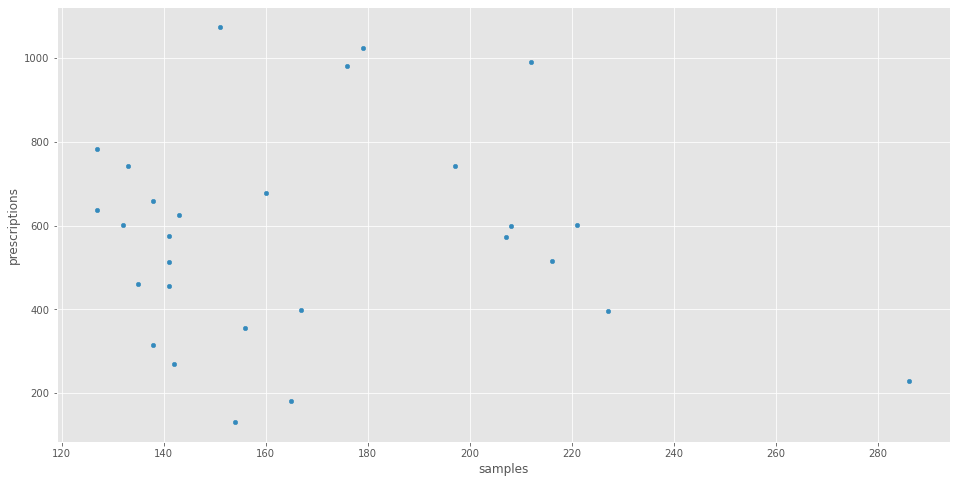

In [61]:
# Samples
df_samples_max.plot(kind='scatter', x='samples', y='prescriptions', figsize=(16, 8))

********************************

#### IDEA 1: Try to calculate slopes for different dataset parts

#### IDEA 2: Try to calculate derivates where tangent to Log curve makes m = 0 (starts to be negative) for each variable (2)

In [50]:
#F2F Meetings

X = df_clean['f2f_sample']
y = df_clean['prescriptions']

In [49]:
#F2F Meetings

X = df_clean['f2f_wo_sample']
y = df_clean['prescriptions']

In [58]:
X = X.mask(X == 0, 1)
X = X.astype(int)

In [59]:
median_y = 1
y = y.mask(y == 0, median_y)
y = y.astype(int)

In [60]:
#fit the model
model_log = np.polyfit(np.log(X), y, 1)

#view the output of the model
print(model_log)

[ 79.57556389 159.31865945]


In [61]:
b = 64.5898188*np.log(0) + 153.2429073
print(b)

-inf


<ipython-input-61-86cc66609439>:1: RuntimeWarning: divide by zero encountered in log
  b = 64.5898188*np.log(0) + 153.2429073


In [62]:
a = ((-1)*(64.5898188))/10000
print(a)

-0.006458981880000001


## Visualization of data with Line

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as metric

In [90]:
model = LinearRegression()

In [91]:
model.fit(X = df_clean[['phone']], y = df_clean[['prescriptions']])

LinearRegression()

In [92]:
# make predictions for those x values and store them
lims = model.predict(np.array([df_clean['phone'].min(), df_clean['phone'].max()]).reshape(-1, 1))
lims

array([[456.38090317],
       [991.18231338]])

In [93]:
df_clean['phone'].min()

0.0

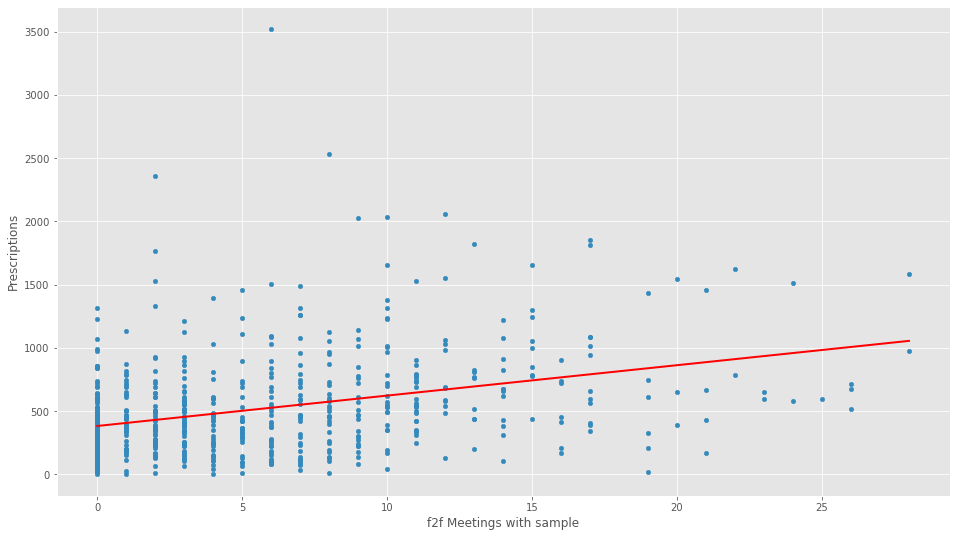

In [61]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('F2F Meetings with sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

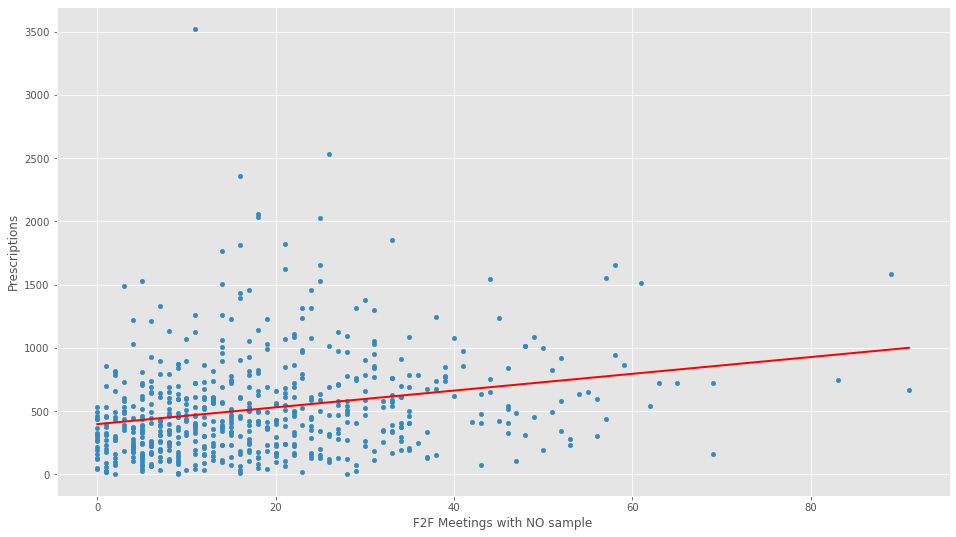

In [70]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_wo_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_wo_sample'].min(), df_clean['f2f_wo_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('F2F Meetings with NO sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

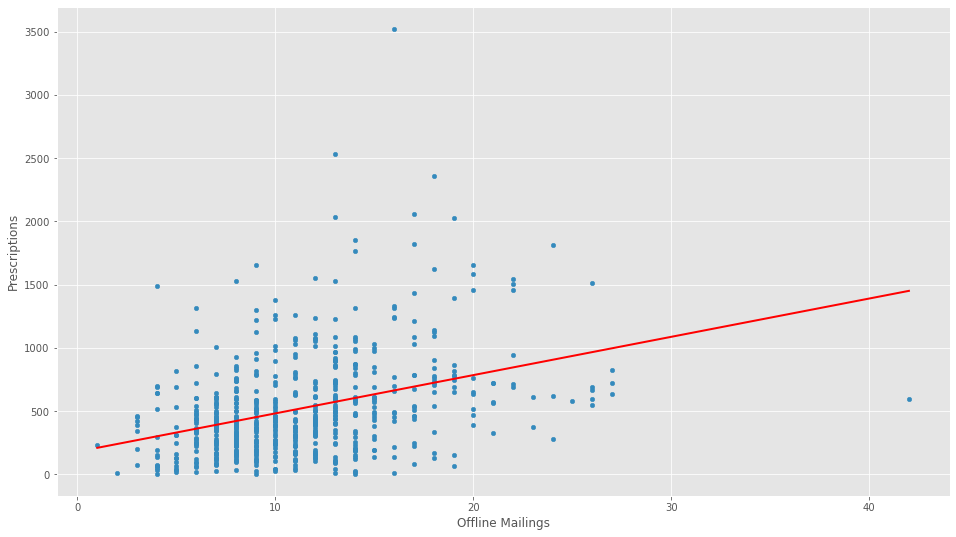

In [76]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='offline_mailings', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['offline_mailings'].min(), df_clean['offline_mailings'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Offline Mailings')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

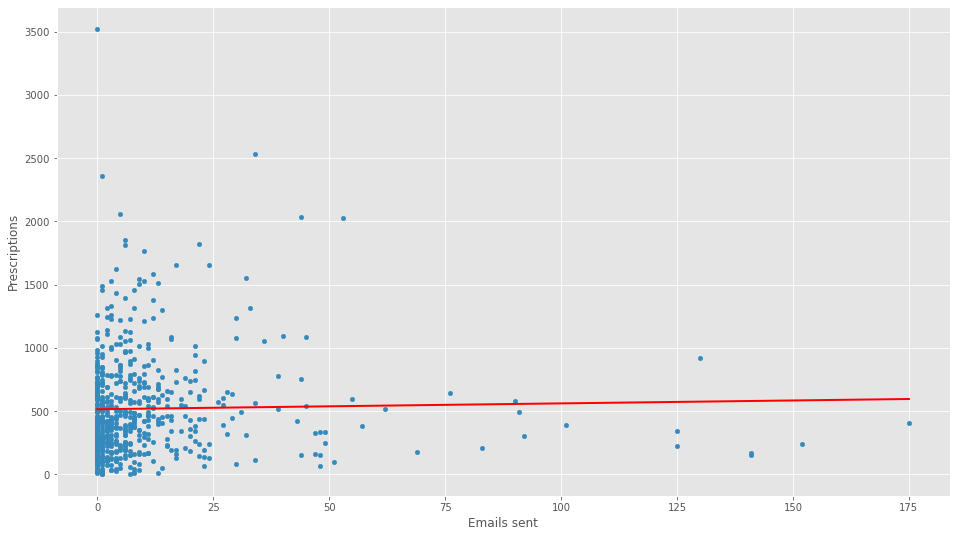

In [82]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='email', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['email'].min(), df_clean['email'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Emails sent')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

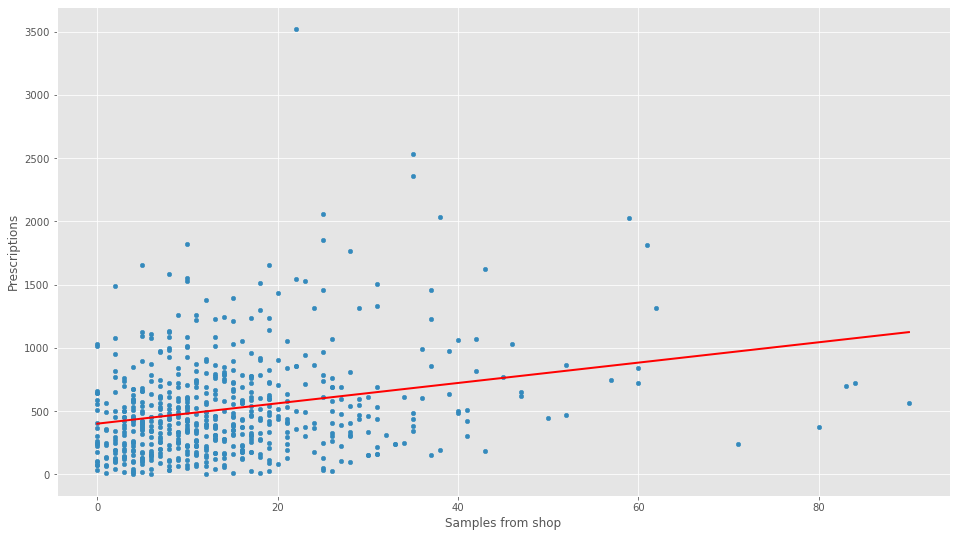

In [88]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='samples_shop', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['samples_shop'].min(), df_clean['samples_shop'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Samples from shop')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

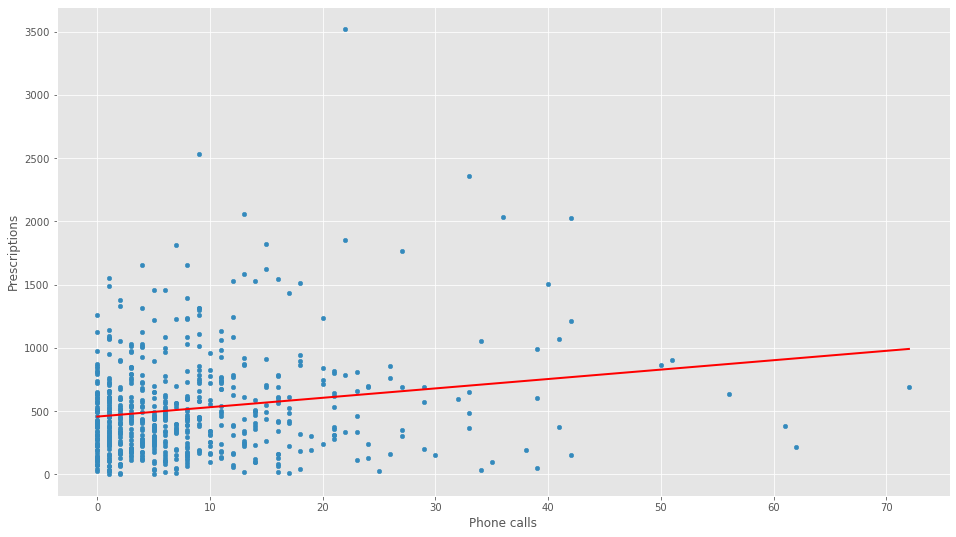

In [94]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='phone', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['phone'].min(), df_clean['phone'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Phone calls')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

## Split Data

In [63]:
perc_values = [0.70, 0.08, 0.22];

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_values[2], random_state=1);

In [65]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (419,)
Train target size = (419,)
Test data size = (119,)
Test target size = (119,)


## Linear Regression: With 1 Variable

### Model creation

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.metrics import mean_absolute_error as metric

In [53]:
model = LinearRegression()

In [54]:
model.fit(X = df_clean[['f2f_sample']], y = df_clean[['prescriptions']])

LinearRegression()

In [55]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_))

w_0 = [382.14751393]
w_1 = [[24.02620201]]


In [ ]:
pred_train = model.predict(X_train[['f2f']])
#pred_val = model.predict(X_val[['f2f']])
pred_test = model.predict(X_test[['f2f']])

In [ ]:
print(pred_test[0:5])
print(np.array(y_test['Prescriptions'][0:5]))

In [ ]:
mae_train = metric(y_train, pred_train)
#mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['1 Variable'],'mae_train':[mae_train],'mae_test':[mae_test]}, columns=['model', 'mae_train', 'mae_test']), ignore_index=True)

In [ ]:
results

### Visualize

In [56]:
# make predictions for those x values and store them
lims = model.predict(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1))
lims

array([[ 382.14751393],
       [1054.88117029]])

In [57]:
df_clean['f2f_sample'].min()

0.0

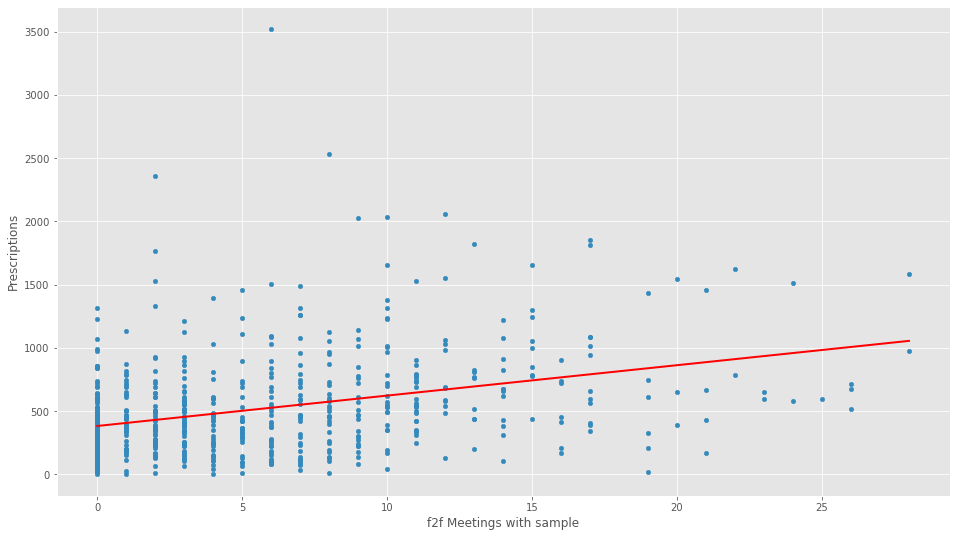

In [60]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('f2f Meetings with sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

## Linear Regression: Multi-Variant

In [ ]:
model.fit(X = X_train[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']], y = y_train)

In [ ]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_[0][0]))
print ('w_2 = ' + str(model.coef_[0][1]))
print ('w_3 = ' + str(model.coef_[0][2]))
print ('w_4 = ' + str(model.coef_[0][3]))
print ('w_5 = ' + str(model.coef_[0][4]))
print ('w_6 = ' + str(model.coef_[0][5]))

In [ ]:
pred_train = model.predict(X_train[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])
#pred_val = model.predict(X_val[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])
pred_test = model.predict(X_test[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])

In [ ]:
print(pred_test[0:5])
print(np.array(y_test['Prescriptions'][0:5]))

In [ ]:
mae_train = metric(y_train, pred_train)
#mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)

In [ ]:
results

In [ ]:
results = results.append(pd.DataFrame(data={'model':['Multivariable'],'mae_train':[mae_train],'mae_test':[mae_test]}, columns=['model', 'mae_train', 'mae_test']), ignore_index=True)
results

## OLS Regression

In [ ]:
## 0.a. With nulls=0 and outliers
X = pd.read_csv('bricks_channels_summarized.csv', sep=',', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized.csv', sep=',', usecols=['Prescriptions'])

In [ ]:
## 0.b. With nulls=0 and NO outliers
df = pd.read_csv('bricks_channels_summarized.csv', sep=',', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
## 1.a. Without outliers (but smaller sample, n = 553) 
df = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
## 1.b. SIMPLE without outliers (but smaller sample) ---> BEST !!
df = pd.read_csv('detailled_channels_utf8.csv', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
count = (df[['f2f', 'total_samples', 'email_total', 'Phone_total', 'katis_klub','Prescriptions']] == 0).sum()
print(count)

In [ ]:
df_clean_full.columns

In [ ]:
## 1.c. LOGARITHMIC SIMPLEST without outliers (but smaller sample, n = 553) ---> BEST !!
#df = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', index_col=[0])
#df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

X = df_clean_full[['f2f', 'total_samples', 'email', 'katis_klub','event_participants_brick','offline_mailings']]
y = df_clean_full[['Prescriptions']]

X = X.mask(X == 0, 0.1)
y = y.mask(y == 0, 1)

X = np.log(X)
y = np.log(y)

In [ ]:
## 2.a. With outliers (but higher sample, n = 611 - MEDIAN)
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
## 2.b. SIMPLE with outliers (but higher sample, n = 611 - MEDIAN) 
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'Phone_total', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
## 2.c. LOGARITHMIC with outliers (but higher sample, n = 611 - MEDIAN)
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

#X = X.mask(X == 0, 1)
y = y.mask(y == 0, 1)

X = np.log(X)
y = np.log(y)

In [ ]:
## 3. With outliers (but higher sample, n = 611 - MEAN)
X = pd.read_csv('bricks_channels_summarized_mean.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_mean.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
#X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

## Logarithmic Model (WIP)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


np.random.seed(123)

In [ ]:
X_array = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f'], index_col=False)
y_array = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'], index_col=False)

In [ ]:
X = pd.DataFrame(X_array, columns = ['f2f'])

In [ ]:
y = pd.DataFrame(y_array, columns = ['Prescriptions'])

In [ ]:
median_f2f = X['f2f'].median()
X = X.f2f.mask(X.f2f == 0, median_f2f)
X = X.astype(int)

In [ ]:
median_f2f = X['f2f'].median()
X = X.f2f.mask(X.f2f == 0, median_f2f)
X = X.astype(int)

median_y = 1
y = y.Prescriptions.mask(y.Prescriptions == 0, median_y)
y = y.astype(int)

#fit the model
model_log = np.polyfit(np.log(X), np.log(y), 1)

#view the output of the model
print(model_log)

In [ ]:
median_y = 1
y = y.Prescriptions.mask(y.Prescriptions == 0, median_y)
y = y.astype(int)

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
#fit the model
model_log = np.polyfit(np.log(X), np.log(y), 1)

#view the output of the model
print(model_log)

In [ ]:
## y = 0.39764207 + 4.51267631 lnX

In [ ]:
# Data
x_trans = transformer.fit_transform(X_array)             # 1

# Regression
regressor = LinearRegression()
results = regressor.fit(x_trans, y_array)                # 2
model = results.predict
y_fit = model(x_trans)

# Visualization
plt.scatter(x_samp, y_samp)
plt.plot(x_samp, y_fit, "k--", label="Fit")             # 3
plt.title("Logarithmic Fit")

In [ ]:
# Visualize

# make predictions for those x values and store them
lims = model_log.predict(np.array([df['f2f'].min(), df['f2f'].max()]).reshape(-1, 1))
lims

In [ ]:
# define a function for fitting
def func(x, a, b, c, d):
    return a * np.exp(-b * (x - c)) + d

init_vals = [50, 0, 90, 63]
# fit your data and getting fit parameters
popt, pcov = curve_fit(func, X, y, p0=init_vals, bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))
# predict new data based on your fit
y_pred = func(200, *popt)
print(y_pred)

plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(xdata, func(xdata, *popt), '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
y = pd.read_csv('bricks_channels_summarized.csv', usecols=['Prescriptions'])
print(y)